In [6]:
from math import exp, factorial
import numpy as np
import matplotlib.pyplot as plt

"""
14) Uma das máquinas florestais que faz a colheita é o Feller Buncher, que tem
seu ciclo operacional de 30 segundos, sendo que processa em média 5 árvores
por ciclo. Qual é a probabilidade que em um certo ciclo, o Feller Buncher
processe no mínimo 3 árvores?

"""


def poisson(k, lambda_):
    return exp(-lambda_) * lambda_**k / factorial(k)


def main():
    lambda_ = 5
    P0 = poisson(0, lambda_)
    P1 = poisson(1, lambda_)
    P2 = poisson(2, lambda_)
    prob_less_than_3 = P0 + P1 + P2
    result = (1 - prob_less_than_3) * 100
    print(f'{result:.2f}%')

main()
            

87.53%


99.92%


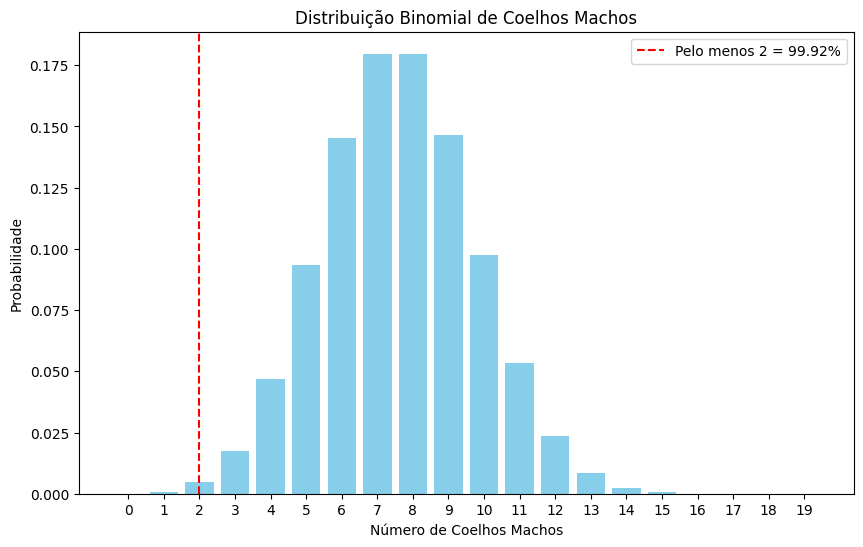

In [16]:
"""" 
15) Numa criação de coelhos, a taxa de nascimento de machos é de 40%. Qual
a probabilidade de que nasçam pelo menos dois coelhos machos, num dia que
nasceram 19 coelhos? Estruturar a função de probabilidade e representar a
distribuição graficamente. 
"""

def binomial_prob(n, p, k):
    return (factorial(n) / (factorial(k) * factorial(n - k))) * p**k * (1 - p)**(n - k)


def distribuition_chart(n, p):
    probabilidades = [binomial_prob(n, p, k) for k in range(n + 1)]
    prob_at_least_2 = sum(probabilidades[2:]) * 100
    plt.figure(figsize=(10, 6))
    plt.bar(range(n + 1), probabilidades, color='skyblue')
    plt.title('Distribuição Binomial de Coelhos Machos')
    plt.xlabel('Número de Coelhos Machos')
    plt.ylabel('Probabilidade')
    plt.xticks(range(n + 1))
    plt.axvline(x=2, color='red', linestyle='--', label=f'Pelo menos 2 = {prob_at_least_2:.2f}%')
    plt.legend()
    plt.show()


def main():
    n = 19
    p = 0.4
    P0 = binomial_prob(n, p, 0)
    P1 = binomial_prob(n, p, 1)
    prob_less_than_2 = P0 + P1
    result = (1 - prob_less_than_2) * 100
    print(f'{result:.2f}%')
    distribuition_chart(n, p)


main()


In [ ]:
"""
16) Uma certa região florestal foi dividida em 109 quadrados para estudar a
distribuição de Primula sinensis. Supõe-se que esta espécie se distribui
aleatoriamente na região. A tabela abaixo indica o número de quadrados com X
Primula sinensis; o número médio de plantas por quadrado foi de 2,2 (encontre
esse valor).
"""


In [18]:
"""
18) Segundo a teoria de Mendel, no enxerto de duas espécies de plantas com
flores amarelas e brancas, 30% das plantas resultantes têm flor amarela. Em
sete pares de plantas enxertadas, qual a probabilidade:
a) de não resultar nenhuma flor amarela?
b) de haver quatro ou mais plantas com flor amarela?
"""

def main():
    n = 7
    p = 0.3
    P0 = binomial_prob(n, p, 0)
    P1 = binomial_prob(n, p, 1)
    P2 = binomial_prob(n, p, 2)
    P3 = binomial_prob(n, p, 3)
    prob_no_yellow = P0 * 100
    prob_4_or_more = (1 - (P0 + P1 + P2 + P3)) * 100
    print(f'a) {prob_no_yellow:.2f}%')
    print(f'b) {prob_4_or_more:.2f}%')
    
main()

a) 8.24%
b) 12.60%
